In [1]:
import trainer as t

Using TensorFlow backend.


In [20]:
from importlib import reload
reload(t)

<module 'trainer' from '/Users/paulm/code/web-traffic-time-series-forecasting/trainer.py'>

# DataSet

In [2]:
d = t.DataSet()

In [3]:
d.num_keys()

145063

In [4]:
rindex = 144278

In [5]:
d.process_index(rindex, 20, 10)

In [6]:
d.x.shape, d.y.shape

((520, 20, 1), (520, 10))

In [7]:
d.npdata.shape

(550,)

# Model

In [7]:
ctx = t.train_model(d, max=64, epochs=10)

In [8]:
import pandas as pd
%matplotlib inline
figsize=(20,4)
def plot_loss(ctx):
    print(ctx.train_time)
    pd.DataFrame({"loss": ctx.history['loss']}).plot(figsize=figsize)

72.23303663299885


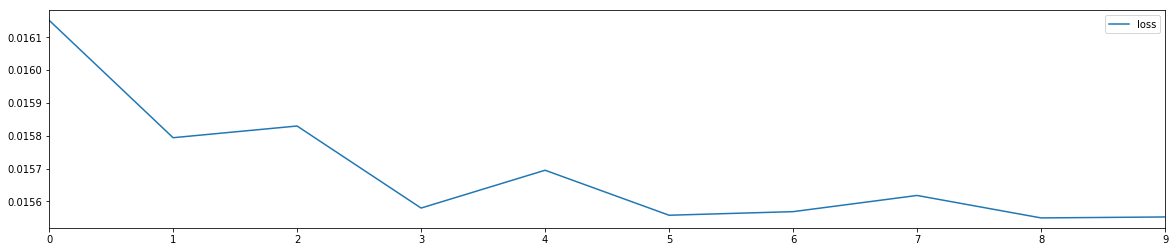

In [11]:
plot_loss(ctx)

In [10]:
ctx.save()

In [9]:
%ls models

o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5
o0020_p0010_m0000_M0064_u064_c002_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c002_lr1.000000e-03_e0010_weights.h5


In [10]:
ctx = t.TrainContext.load(20, 10, 0, 64, 64, 1, 1e-3, 10)

In [12]:
ctx.model.predict(d.last_obs())

array([[ 0.05858583,  0.06257592,  0.06729545,  0.06403192,  0.07376928,
         0.07235757,  0.0609334 ,  0.06497053,  0.06867419,  0.06536846]], dtype=float32)

## Retrain

In [16]:
ctx.train(d, lr=1e-3, epochs=4, max=2)

0.7731216020038119


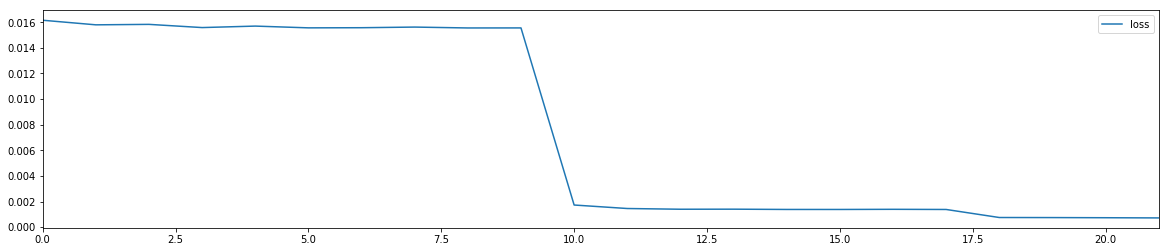

In [17]:
plot_loss(ctx)

In [18]:
import os

In [21]:
os.path.exists('models')

True

In [20]:
os.mkdir('models')

# next

In [13]:
ctx = t.train_model(d, max=64, cells=2, epochs=10, verbose=True)

Epoch 1/10
64/64 [==============================] - 13s - loss: 0.0161    
Epoch 2/10
64/64 [==============================] - 10s - loss: 0.0158    
Epoch 3/10
64/64 [==============================] - 10s - loss: 0.0158    
Epoch 4/10
64/64 [==============================] - 10s - loss: 0.0157    
Epoch 5/10
64/64 [==============================] - 10s - loss: 0.0157    
Epoch 6/10
64/64 [==============================] - 10s - loss: 0.0156    
Epoch 7/10
64/64 [==============================] - 10s - loss: 0.0156    
Epoch 8/10
64/64 [==============================] - 10s - loss: 0.0156    
Epoch 9/10
64/64 [==============================] - 10s - loss: 0.0156    
Epoch 10/10
64/64 [==============================] - 10s - loss: 0.0156    


113.29565158100013


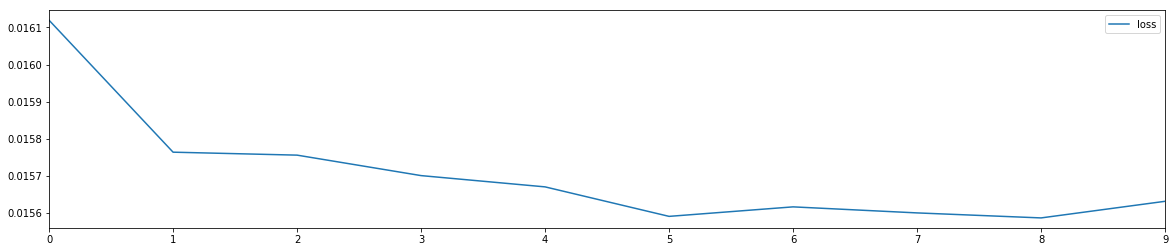

In [14]:
plot_loss(ctx)

In [15]:
ctx.save()

In [16]:
%ls models

o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c001_lr1.000000e-03_e0010_weights.h5
o0020_p0010_m0000_M0064_u064_c002_lr1.000000e-03_e0010.pkl
o0020_p0010_m0000_M0064_u064_c002_lr1.000000e-03_e0010_weights.h5
